In [1]:
import os
os.chdir('/home/cs/Desktop/heart-disease-project/heart-disease-project/heart-disease-classification')

os.getcwd()

'/home/cs/Desktop/heart-disease-project/heart-disease-project/heart-disease-classification'

In [2]:
import pandas as pd


In [3]:

df=pd.read_csv('dataset/heart-disease.csv')
df.describ()

AttributeError: 'DataFrame' object has no attribute 'describ'

In [ ]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

<Axes: xlabel='sex'>

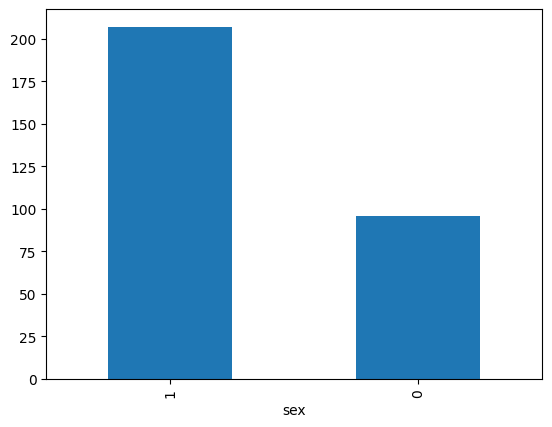

In [ ]:
df['sex'].value_counts().plot(kind='bar')

<Axes: xlabel='target'>

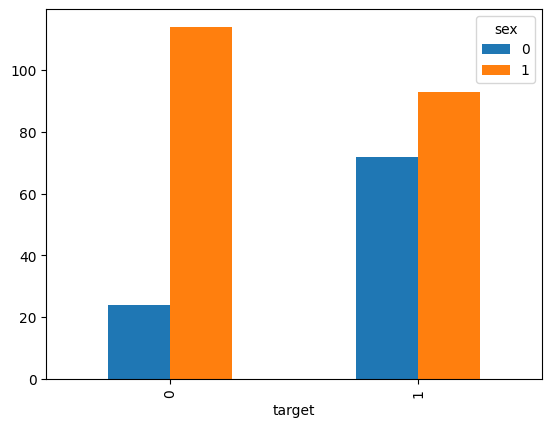

In [ ]:
pd.crosstab(df.target,df.sex).plot(kind='bar')

<Axes: xlabel='thalach'>

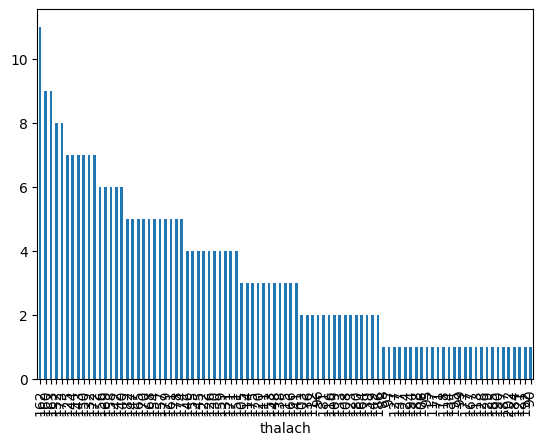

In [ ]:
df['thalach'].value_counts().plot(kind='bar')

In [ ]:
import matplotlib.pyplot as plt

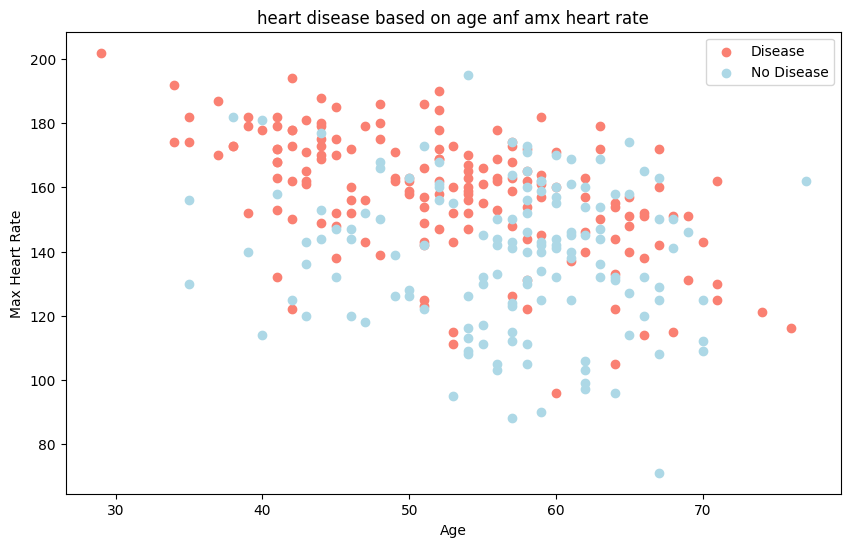

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon')
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue')
plt.title('heart disease based on age and max heart rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease'])

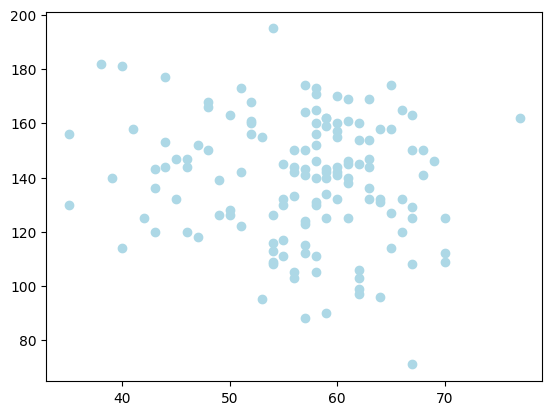

In [ ]:
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue')

<Axes: ylabel='Frequency'>

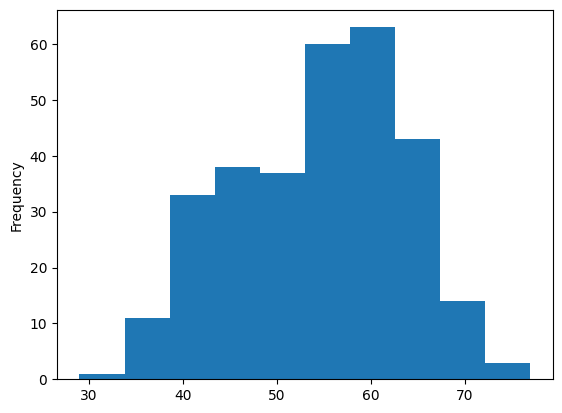

In [ ]:
df.age.plot.hist()

In [ ]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


/tmp/ipykernel_4638/513067550.py:9: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("No Disease","Disease")


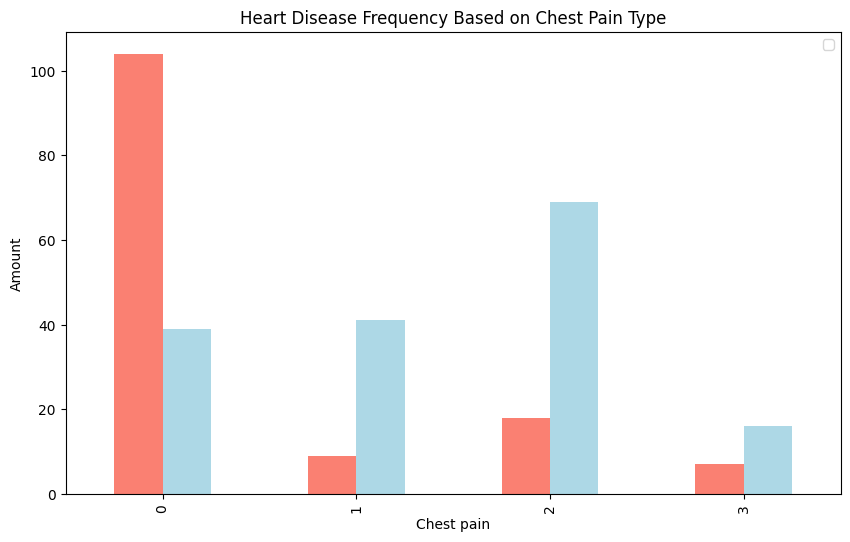

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['salmon','lightblue']
                                  )

plt.title('Heart Disease Frequency Based on Chest Pain Type')
plt.xlabel('Chest pain')
plt.ylabel('Amount')
plt.legend("No Disease","Disease")

In [6]:
df.head()
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [8]:
X=df.drop('target',axis=1)
y=df['target']
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
models={'Logistic Regression':LogisticRegression(),
        'KNN':KNeighborsClassifier(),
        'Random Forest':RandomForestClassifier()}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fit and Evaluate given ml Models
    models: different sckit-learn ml models

    """
    np.random.seed(42)

    model_scores={}

    for name,model in models.items():
        model.fit(X_train,y_train)

        model_scores[name]=model.score(X_test,y_test)


    return model_scores


In [15]:
model_scores=fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

/home/cs/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

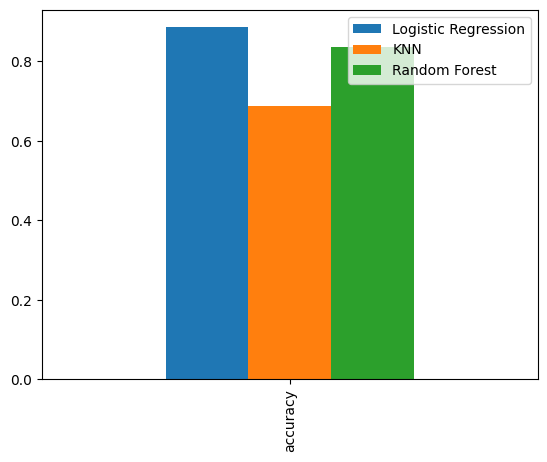

In [17]:
model_compare=pd.DataFrame(model_scores, index=['accuracy'])
model_compare.plot.bar()

In [18]:
#hyper parameter tuning for knn

training_score=[]
test_score=[]

knn=KNeighborsClassifier()

for i in range(1,21):
    knn.set_params(n_neighbors=i)
    
    training_score.append(knn.score())

